Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

It wraps the efficient numerical computation libraries Theano and TensorFlow and allows you to define and train neural network models in just a few lines of code

#### Step 1. Load Data

In [1]:
# first neural network with keras tutorial
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

In [2]:
# load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/mona-patra/FDP-5days/main/Day%204/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
# split into input (X) and output (y) variables
X = df.drop(['Outcome'], axis = 1)
y = df["Outcome"]

In [6]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split # Import train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

#### Step 2. Define Keras Model

Models in Keras are defined as a sequence of layers.

We create a Sequential model and add layers one at a time until we are happy with our network architecture.

The first thing to get right is to ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument and setting it to 8 for the 8 input variables.

How do we know the number of layers and their types?

This is a very hard question. There are heuristics that we can use and often the best network structure is found through a process of trial and error experimentation (I explain more about this here). Generally, you need a network large enough to capture the structure of the problem.

In this example, we will use a fully-connected network structure with three layers.

Fully connected layers are defined using the Dense class. We can specify the number of neurons or nodes in the layer as the first argument, and specify the activation function using the activation argument.

We will use the rectified linear unit activation function referred to as ReLU on the first two layers and the Sigmoid function in the output layer.

It used to be the case that Sigmoid and Tanh activation functions were preferred for all layers. These days, better performance is achieved using the ReLU activation function. We use a sigmoid on the output layer to ensure our network output is between 0 and 1 and easy to map to either a probability of class 1 or snap to a hard classification of either class with a default threshold of 0.5.

We can piece it all together by adding each layer:

The model expects rows of data with 8 variables (the input_dim=8 argument)
The first hidden layer has 12 nodes and uses the relu activation function.
The second hidden layer has 8 nodes and uses the relu activation function.
The output layer has one node and uses the sigmoid activation function.

In [7]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Note, the most confusing thing here is that the shape of the input to the model is defined as an argument on the first hidden layer. This means that the line of code that adds the first Dense layer is doing 2 things, defining the input or visible layer and the first hidden layer.

#### Step 3. Compile Keras Model

Compiling the model uses the efficient numerical libraries under the covers (the so-called backend) such as Theano or TensorFlow. The backend automatically chooses the best way to represent the network for training and making predictions to run on your hardware, such as CPU or GPU or even distributed.

When compiling, we must specify some additional properties required when training the network. Remember training a network means finding the best set of weights to map inputs to outputs in our dataset.

We must specify the loss function to use to evaluate a set of weights, the optimizer is used to search through different weights for the network and any optional metrics we would like to collect and report during training.

In this case, we will use cross entropy as the loss argument. This loss is for a binary classification problems and is defined in Keras as “binary_crossentropy“

We will define the optimizer as the efficient stochastic gradient descent algorithm “adam“. This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems.

Finally, because it is a classification problem, we will collect and report the classification accuracy, defined via the metrics argument

In [8]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Step 4. Fit Keras Model

We can train or fit our model on our loaded data by calling the fit() function on the model.

Training occurs over epochs and each epoch is split into batches.

Epoch: One pass through all of the rows in the training dataset.
Batch: One or more samples considered by the model within an epoch before weights are updated.

For this problem, we will run for a small number of epochs (150) and use a relatively small batch size of 10.

These configurations can be chosen experimentally by trial and error. We want to train the model enough so that it learns a good (or good enough) mapping of rows of input data to the output classification. The model will always have some error, but the amount of error will level out after some point for a given model configuration. This is called model convergence

In [9]:
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=150)

Epoch 1/150
17/17 [==============================] - 0s 1ms/step - loss: 1.8155 - accuracy: 0.5009
Epoch 2/150
17/17 [==============================] - 0s 1ms/step - loss: 1.4105 - accuracy: 0.5289
Epoch 3/150
17/17 [==============================] - 0s 1ms/step - loss: 1.1909 - accuracy: 0.5438
Epoch 4/150
17/17 [==============================] - 0s 1ms/step - loss: 1.0722 - accuracy: 0.5736
Epoch 5/150
17/17 [==============================] - 0s 1ms/step - loss: 0.9927 - accuracy: 0.5773
Epoch 6/150
17/17 [==============================] - 0s 1ms/step - loss: 0.9240 - accuracy: 0.5978
Epoch 7/150
17/17 [==============================] - 0s 2ms/step - loss: 0.8540 - accuracy: 0.6071
Epoch 8/150
17/17 [==============================] - 0s 2ms/step - loss: 0.8150 - accuracy: 0.6182
Epoch 9/150
17/17 [==============================] - 0s 2ms/step - loss: 0.7666 - accuracy: 0.6425
Epoch 10/150
17/17 [==============================] - 0s 1ms/step - loss: 0.7352 - accuracy: 0.6462
Epoch 11/

17/17 [==============================] - 0s 1ms/step - loss: 0.5597 - accuracy: 0.7263
Epoch 84/150
17/17 [==============================] - 0s 2ms/step - loss: 0.5597 - accuracy: 0.7207
Epoch 85/150
17/17 [==============================] - 0s 1ms/step - loss: 0.5436 - accuracy: 0.7263
Epoch 86/150
17/17 [==============================] - 0s 1ms/step - loss: 0.5569 - accuracy: 0.7095
Epoch 87/150
17/17 [==============================] - 0s 1ms/step - loss: 0.5475 - accuracy: 0.7318
Epoch 88/150
17/17 [==============================] - 0s 1ms/step - loss: 0.5409 - accuracy: 0.7356
Epoch 89/150
17/17 [==============================] - 0s 1ms/step - loss: 0.5522 - accuracy: 0.7188
Epoch 90/150
17/17 [==============================] - 0s 1ms/step - loss: 0.5467 - accuracy: 0.7281
Epoch 91/150
17/17 [==============================] - 0s 1ms/step - loss: 0.5452 - accuracy: 0.7300
Epoch 92/150
17/17 [==============================] - 0s 1ms/step - loss: 0.5447 - accuracy: 0.7318
Epoch 93/150


This is where the work happens on your CPU or GPU

#### Step 5. Evaluate Keras Model

You can evaluate your model on your training dataset using the evaluate() function on your model and pass it the same input and output used to train the model.

This will generate a prediction for each input and output pair and collect scores, including the average loss and any metrics you have configured, such as accuracy.

The evaluate() function will return a list with two values. The first will be the loss of the model on the dataset and the second will be the accuracy of the model on the dataset. We are only interested in reporting the accuracy, so we will ignore the loss value.

In [10]:
# evaluate the keras model on the training dataset
model.evaluate(X_train, y_train)

17/17 [==============================] - 0s 761us/step - loss: 0.5133 - accuracy: 0.7467


[0.5132669806480408, 0.7467411756515503]

In [11]:
# evaluate the keras model on test dataset
model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 896us/step - loss: 0.5829 - accuracy: 0.7446


[0.5829410552978516, 0.7445887327194214]

#### Step 6. Make Predictions

Making predictions is as easy as calling the predict() function on the model. We are using a sigmoid activation function on the output layer, so the predictions will be a probability in the range between 0 and 1. We can easily convert them into a crisp binary prediction for this classification task by rounding them.

In [12]:
# make probability predictions with the model
predictions = model.predict(X_test)
print(predictions[:5])

[[0.6715474 ]
 [0.6026068 ]
 [0.38425094]
 [0.0692136 ]
 [0.29578862]]


In [13]:
# round predictions 
y_pred = [round(x[0]) for x in predictions]
print(y_pred)

[1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1]


In [14]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       146
           1       0.67      0.61      0.64        85

    accuracy                           0.74       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



Text(69.0, 0.5, 'Truth')

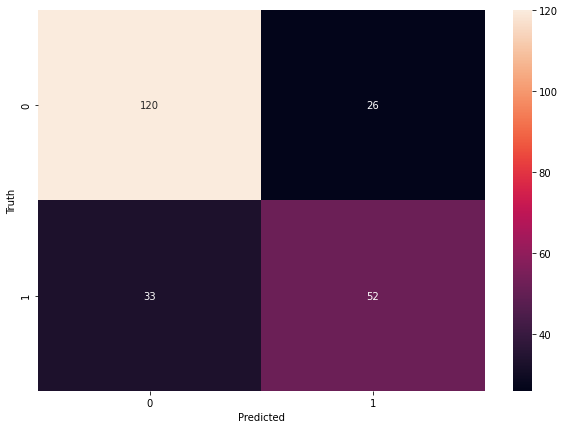

In [15]:
import seaborn as sn
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')